#Import Library yang Diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Load Dataset dari Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/House_Rent_Dataset.csv')
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


#Data Understanding

In [ ]:
#Jumlah baris dan kolom pada dataset
df.shape

(4746, 12)

In [ ]:
#Melihat kolom dan tipe data
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

## Data Categorical

In [ ]:
#Mengecek jumlah dari setiap nilai pada fitur Posted On
df["Posted On"].value_counts()

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64

Fitur Posted On memiliki 81 nilai unique

In [ ]:
#Mengecek jumlah dari setiap nilai pada fitur Floor
df["Floor"].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

Fitur Posted On memiliki 480 nilai unique

In [ ]:
#Mengecek jumlah dari setiap nilai pada fitur Area Locality
df["Area Locality"].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

Fitur Area Locality memiliki 2235 nilai unique

In [ ]:
#Mengecek jumlah dari setiap nilai pada fitur Area Type
df["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

Fitur Area Type memiliki 3 nilai unique

In [ ]:
#Mengecek jumlah dari setiap nilai pada fitur City
df["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

Fitur City memiliki 6 nilai unique

In [ ]:
#Mengecek jumlah dari setiap nilai pada fitur Tenant Preferred
df["Tenant Preferred"].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

Fitur Tenant Preferred memiliki 3 nilai unique

In [ ]:
#Mengecek jumlah dari setiap nilai pada fitur Furnishing Status
df["Furnishing Status"].value_counts()

Fitur Furnishing Status memiliki 3 nilai unique

In [ ]:
#Mengecek jumlah dari setiap nilai pada fitur Point of Contact
df["Point of Contact"].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

Fitur Point of Contact memiliki 3 nilai unique

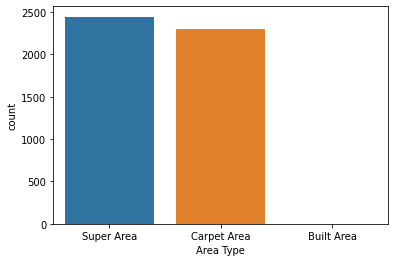

In [ ]:
#Countplot Area Type
sns.countplot("Area Type",data=df)

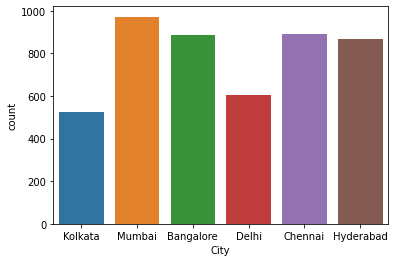

In [ ]:
#Countplot City
sns.countplot("City",data=df)

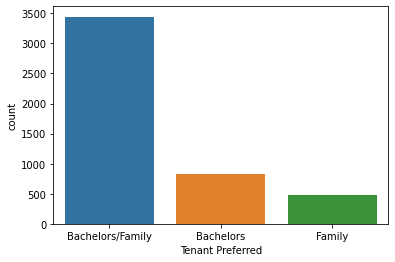

In [ ]:
#Countplot Tenant Preferred
sns.countplot("Tenant Preferred",data=df)

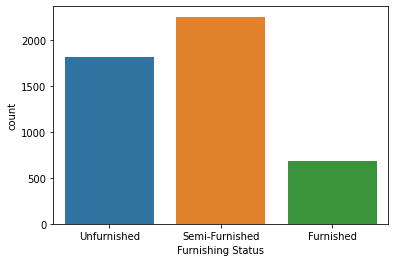

In [ ]:
#Countplot Furnishing Status
sns.countplot("Furnishing Status",data=df)

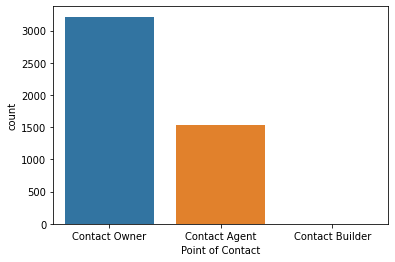

In [ ]:
#Countplot Point of Contact
sns.countplot("Point of Contact",data=df)

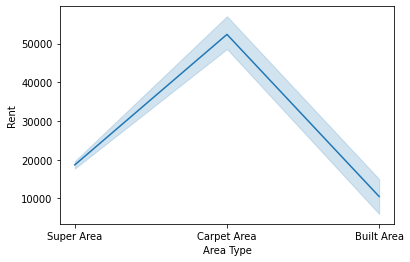

In [ ]:
#Lineplot Area Type
sns.lineplot(x=df['Area Type'], y=df['Rent'])

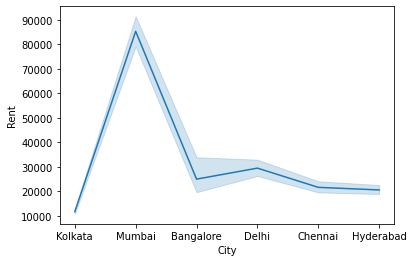

In [ ]:
#Lineplot City
sns.lineplot(x=df['City'], y=df['Rent'])

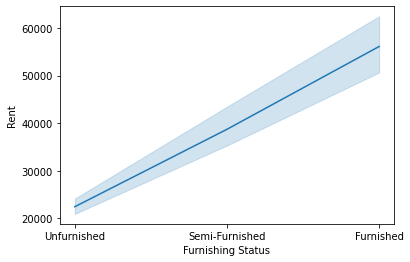

In [ ]:
#Lineplot Furnishing Status
sns.lineplot(x=df['Furnishing Status'], y=df['Rent'])

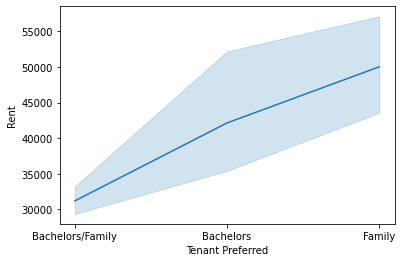

In [ ]:
#Lineplot Tenant Preferred
sns.lineplot(x=df['Tenant Preferred'], y=df['Rent'])

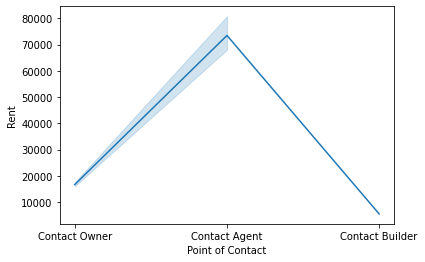

In [ ]:
#Lineplot Point of Contact
sns.lineplot(x=df['Point of Contact'], y=df['Rent'])

## Data Numerical

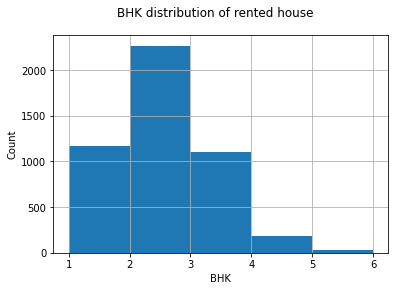

In [ ]:
#BHK Distribution
df['BHK'].hist(bins=5)
plt.suptitle('BHK distribution of rented house')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

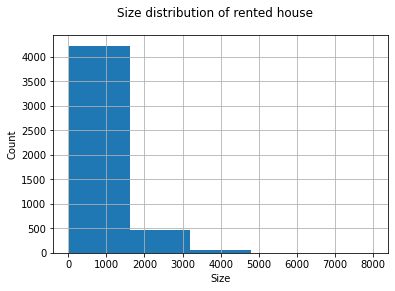

In [ ]:
#Size Distribution
df['Size'].hist(bins=5)
plt.suptitle('Size distribution of rented house')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

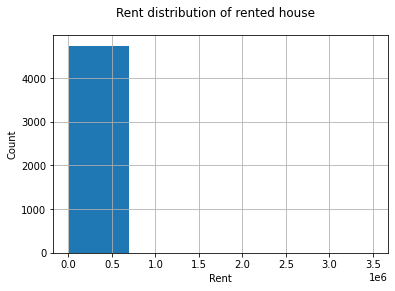

In [ ]:
#Rent Distribution
df['Rent'].hist(bins=5)
plt.suptitle('Rent distribution of rented house')
plt.xlabel('Rent')
plt.ylabel('Count')
plt.show()

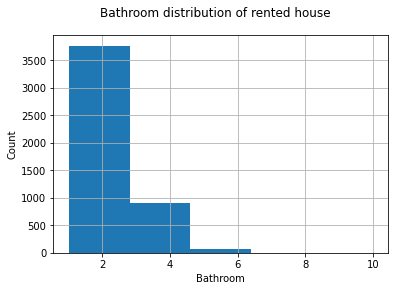

In [ ]:
#Bathroom Distribution
df['Bathroom'].hist(bins=5)
plt.suptitle('Bathroom distribution of rented house')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.show()

In [ ]:
#Describe data
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
#Melihat Korelasi/Hubungan antar Kolom
df.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


#Data Preparation and Cleaning

## Drop kolom yang tidak diperlukan

In [ ]:
#drop kolom yang tidak digunakan
df.drop(['Posted On', 'Floor','Area Locality'],axis=1,inplace=True)

Kolom 'Posted On', 'Floor', dan 'Area Locality' di-drop karena kolom-kolom tersebut memiliki banyak sekali nilai yang unique

In [ ]:
#Mengecek kolom setelah drop tiga kolom
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

## Menghapus baris duplikat

In [ ]:
#Menghapus baris duplikat
df = df[~df.duplicated()]

In [ ]:
#Mengecek jumlah baris dan kolom setelah menghapus baris duplikat
df.shape

(4486, 9)

## Mengecek missing values

In [ ]:
#Mengecek missing values
df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Tidak ditemukan missing values pada data

## Outliers handling

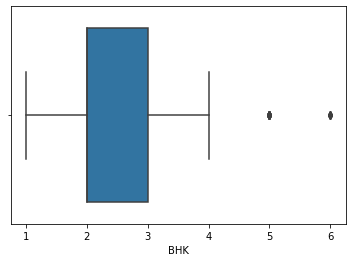

In [ ]:
#Mengecek Outliers pada kolom BHK
sns.boxplot(x="BHK",data=df)

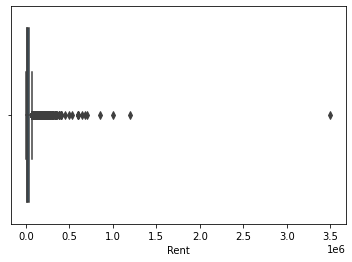

In [ ]:
#Mengecek Outliers pada kolom Rent
sns.boxplot(x="Rent",data=df)

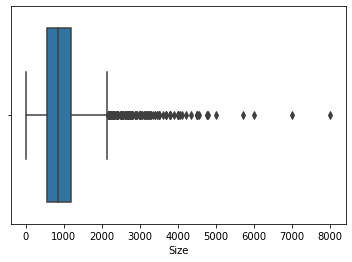

In [ ]:
#Mengecek Outliers pada kolom Size
sns.boxplot(x="Size",data=df)

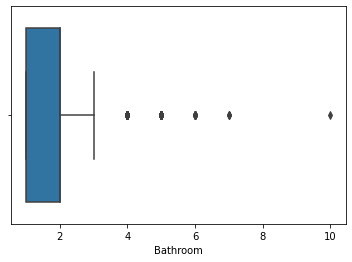

In [ ]:
#Mengecek Outliers pada kolom Bathroom
sns.boxplot(x="Bathroom", data=df)

In [ ]:
#Ouliers Handling Kolom BHK
Q1=df['BHK'].quantile(0.25)
Q3=df['BHK'].quantile(0.75)
IQR=Q3-Q1
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)

df.loc[(df['BHK']>Upper_Bound)] = df['BHK'].median()

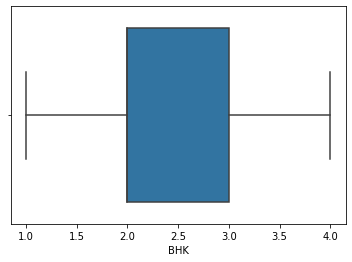

In [ ]:
sns.boxplot(x="BHK",data=df)

In [ ]:
#Ouliers Handling Kolom Rent
Q1_Rent=df['Rent'].quantile(0.25)
Q3_Rent=df['Rent'].quantile(0.75)
IQR_Rent=Q3_Rent-Q1_Rent
LowerBoundRent = Q1_Rent - 1.5 * IQR_Rent
UpperBoundRent = Q3_Rent + 1.5 * IQR_Rent

df.loc[(df['Rent']>UpperBoundRent)] = UpperBoundRent

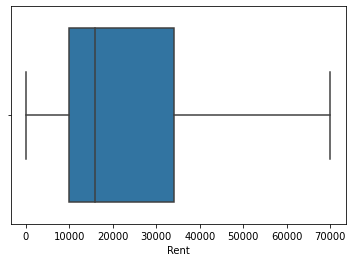

In [ ]:
sns.boxplot(x="Rent",data=df)

In [ ]:
#Ouliers Handling Kolom Size
Q1_Size=df['Size'].quantile(0.25)
Q3_Size=df['Size'].quantile(0.75)
IQR_Size=Q3_Size-Q1_Size
LowerBoundSize = Q1_Size - 1.5 * IQR_Size
UpperBoundSize = Q3_Size + 1.5 * IQR_Size

df.loc[(df['Size']>UpperBoundSize)] = UpperBoundSize

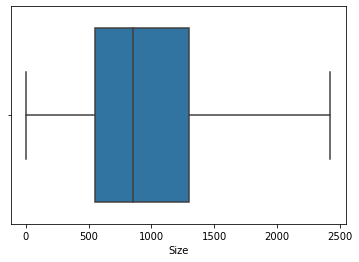

In [ ]:
sns.boxplot(x="Size",data=df)

In [ ]:
#Ouliers Handling Kolom Bathroom
Q1_Bathroom=df['Bathroom'].quantile(0.25)
Q3_Bathroom=df['Bathroom'].quantile(0.75)
IQR_Bathroom=Q3_Bathroom-Q1_Bathroom
LowerBoundBathroom = Q1_Bathroom - 1.5 * IQR_Bathroom
UpperBoundBathroom = Q3_Bathroom + 1.5 * IQR_Bathroom

df.loc[(df['Bathroom']>UpperBoundBathroom)] = df['Bathroom'].median()

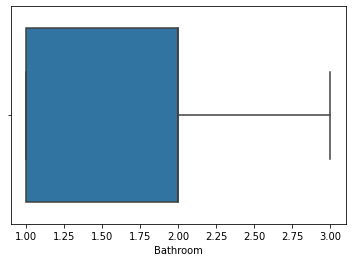

In [ ]:
sns.boxplot(x="Bathroom",data=df)

In [ ]:
#Melihat tipe data setelah penanganan outliers
df.dtypes

BHK                  float64
Rent                 float64
Size                 float64
Area Type             object
City                  object
Furnishing Status     object
Tenant Preferred      object
Bathroom             float64
Point of Contact      object
dtype: object

In [ ]:
#Mengubah tipe data float menjadi integer
df[['BHK','Rent','Size','Bathroom']] = df[['BHK','Rent','Size','Bathroom']].astype(int)

In [ ]:
#Melihat tipe data setelah perubahan
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

# Encoding

In [ ]:
#Encoding Categorical Data
df2 = df.join(pd.get_dummies(df[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']], drop_first=True))
df2.drop(columns = ['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact'], inplace = True)

In [ ]:
#Tipe data setelah proses encoding
df2.dtypes

BHK                                  int64
Rent                                 int64
Size                                 int64
Bathroom                             int64
Area Type_Built Area                 uint8
Area Type_Carpet Area                uint8
Area Type_Super Area                 uint8
City_Bangalore                       uint8
City_Chennai                         uint8
City_Delhi                           uint8
City_Hyderabad                       uint8
City_Kolkata                         uint8
City_Mumbai                          uint8
Furnishing Status_Furnished          uint8
Furnishing Status_Semi-Furnished     uint8
Furnishing Status_Unfurnished        uint8
Tenant Preferred_Bachelors           uint8
Tenant Preferred_Bachelors/Family    uint8
Tenant Preferred_Family              uint8
Point of Contact_Contact Agent       uint8
Point of Contact_Contact Builder     uint8
Point of Contact_Contact Owner       uint8
dtype: object

In [ ]:
df2.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


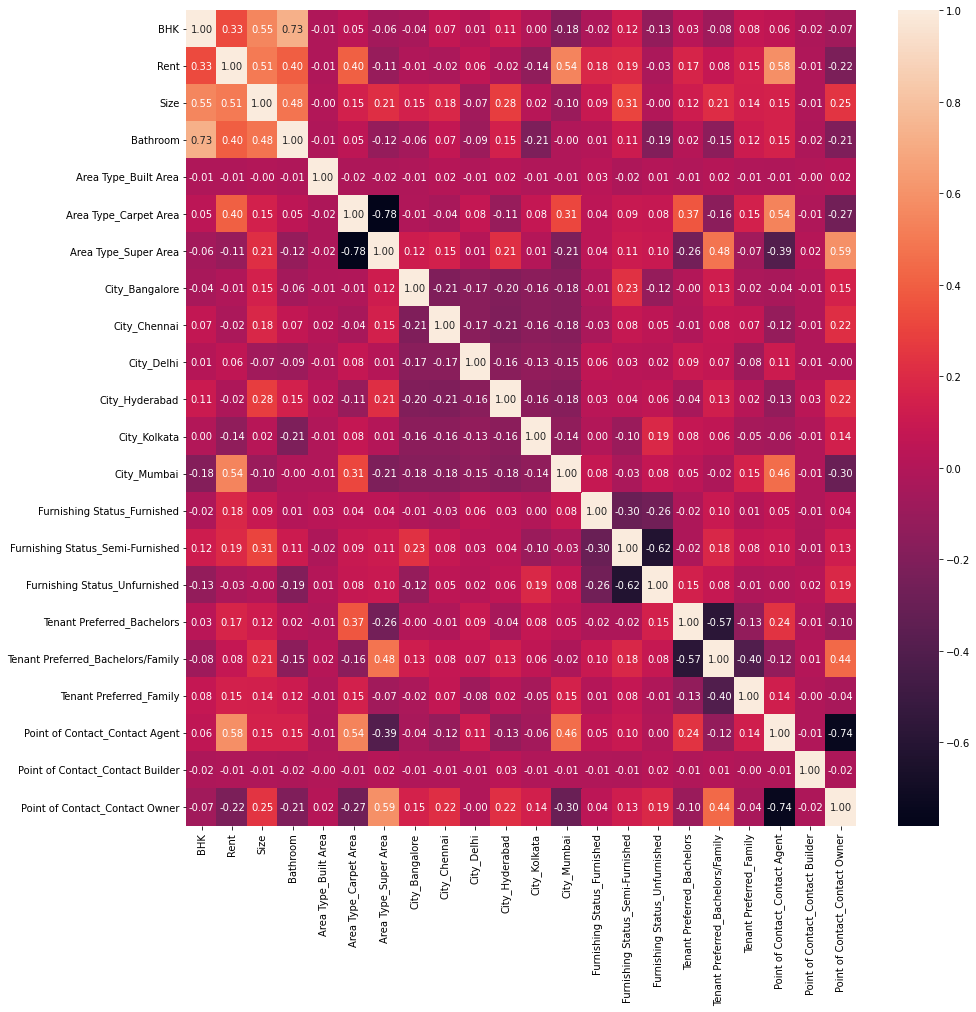

In [ ]:
#Melihat korelasi antar kolom pada data setelah proses encoding
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

# Modelling

In [ ]:
#Memisahkan training dan testing data
X=df2.drop('Rent', axis=1)
y=df2['Rent']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
#Linear Regression Model
linearmodel=LinearRegression()
linearmodel.fit(X_train,y_train)
print("Linear Regression Training Accuracy:", linearmodel.score(X_train,y_train))
print("Linear Regression Testing Accuracy:", linearmodel.score(X_test,y_test))

Linear Regression Training Accuracy: 0.742174452791749
Linear Regression Testing Accuracy: 0.7273555554283502


In [ ]:
#Random Forest Regression Model
random_forest_model=RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
print("Random Forest Training Accuracy:", random_forest_model.score(X_train,y_train))
print("Random Forest Testing Accuracy:", random_forest_model.score(X_test,y_test))

Random Forest Training Accuracy: 0.9421467289553468
Random Forest Testing Accuracy: 0.7475856938974149


In [ ]:
#Decision Tree Model
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
print("Decision Tree Training Accuracy:", tree_model.score(X_train,y_train))
print("Decision Tree Testing Accuracy:", tree_model.score(X_test,y_test))

Decision Tree Training Accuracy: 0.9687695419061364
Decision Tree Testing Accuracy: 0.6048607460162556


In [ ]:
#LightGBM Model
xg_model = LGBMRegressor()
xg_model.fit(X_train, y_train)
print("LightGBM Training Accuracy:", xg_model.score(X_train,y_train))
print("LightGBM Testing Accuracy:", xg_model.score(X_test,y_test))

LightGBM Training Accuracy: 0.8559861785623437
LightGBM Testing Accuracy: 0.7755406041453974


In [ ]:
#Gradient Boost Model
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
print("Gradient Boost Training Accuracy:", gb_model.score(X_train,y_train))
print("Gradient Boost Testing Accuracy:", gb_model.score(X_test,y_test))

Gradient Boost Training Accuracy: 0.8153069053923592
Gradient Boost Testing Accuracy: 0.7676508149599277


## Model Evaluation

In [ ]:
#Membuat fungsi evaluate untuk evaluasi model berdasarkan MAE, RMSE, dan R2 Score
def evaluate(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)

    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))

In [ ]:
#Evaluasi Linear Regression
evaluate(LinearRegression())

MAE: 5348.235710270583
RMSE: 7776.843283250161
R2 Score: 0.7273555554283502


In [ ]:
#Evaluasi Random Forest
evaluate(RandomForestRegressor())

MAE: 4797.902090693383
RMSE: 7428.73275399748
R2 Score: 0.751217728713236


In [ ]:
#Evaluasi Decision Tree
evaluate(DecisionTreeRegressor())

MAE: 5896.512965319758
RMSE: 9460.65285856543
R2 Score: 0.5965105603393742


In [ ]:
#Evaluasi LightGBM
evaluate(LGBMRegressor())

MAE: 4578.0235466226395
RMSE: 7056.249291240191
R2 Score: 0.7755406041453974


In [ ]:
#Evaluasi Gradient Boost
evaluate(GradientBoostingRegressor())

MAE: 4557.634381011197
RMSE: 7167.313326071107
R2 Score: 0.7684190989699724
